# Fake News Detection 

Dataset is gotten from Kaggle 

### 1. importing libraries

In [1]:
import pandas as pd
import numpy as np

# Visualiztion libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# NLP libraries to clean the text data
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

# Vectorization technique TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

# For Splitting the dataset
from sklearn.model_selection import train_test_split

# Model libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import RidgeClassifier

# For hyperparameter Tunning
from sklearn.model_selection import GridSearchCV


#Accuracy measuring library
from sklearn.metrics import accuracy_score, classification_report 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import warnings
warnings.filterwarnings("ignore")

### 2. Loading the data




In [2]:
file_path = r'C:\Users\HP 1030 G2\Documents\train.csv'
data = pd.read_csv(file_path)

In [3]:
#Returns the number of rows and columns present in the dataset

data.shape 

(20800, 5)

In [4]:
# Returns the first 5 rows of the dataset
data.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [5]:
# Returns the column headings
data.columns 

Index(['id', 'title', 'author', 'text', 'label'], dtype='object')

In [6]:
#To check the null values in the dataset, if there're any
data.isnull().sum() 

id           0
title      558
author    1957
text        39
label        0
dtype: int64

### 3. Data-Preprocessing
For further analysis, Data cleaning is required. In this Notebook, I will clean data in three stages:

1. Removing the Null values
2. Drop features that are not needed
3. Text Processing


In [7]:
df_ = data.copy() #Creating a copy of my data, I will be working on this Dataframe

### 3.1. Removing the Null Values

As text field has some empty fields, it can be handled in two ways:

1. Drop the 39 rows
2. Replace the null value with a dummy string

I'll go with the second option because, while dropping 39 rows would have no effect on accuracy as it is such a small portion of our large dataset, it's never a good idea.

I'm going to replace the Null(Nan) values in the `text` field with an empty `string (")`.

In [8]:
df_['text'] = df_['text'].fillna('')   # As text is empty, just filled with an empty space

In [9]:
df_.isnull().sum()  # No null values found in the text field

id           0
title      558
author    1957
text         0
label        0
dtype: int64

### 3.2. Drop features that are not needed


In [10]:
features_dropped = ['author','title','id']
df = df_.drop(features_dropped, axis =1)

In [11]:
df.columns # Returns the needed column headings

Index(['text', 'label'], dtype='object')

### 3.4. Text Processing

1. Remove symbols `(',','-',...etc)`
2. Remove stop words
3. lemmatization

In [12]:
# Defining stop_words and lemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words("english"))

lemmatizer = WordNetLemmatizer()

# Defining clean_text function
def clean_text(text):    
    
    # Removing symbols (',','-',...etc) leaving letter and readable numeric values
    text = re.sub(r'[^A-Za-z0-9]+',' ',text)
    
    # converting all text to lower case
    text = text.lower()           
    
    # spliting and returning all words to their dictionary form or root form using list comprehension
    text = [lemmatizer.lemmatize(token) for token in text.split(" ")]   # returns words dictionary meaning 
    text = [lemmatizer.lemmatize(token) for token in text]   # splits and single word into smaller piece
    
    # eliminating unimportant words like ('a','an','the') for model to focus on the most important words
    text = [word for word in text if not word in stop_words] 
    
    # to separate each words in text with whitespace
    text = " ".join(text)    
    return text

[nltk_data] Downloading package stopwords to C:\Users\HP 1030
[nltk_data]     G2\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\HP 1030
[nltk_data]     G2\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [13]:
%%time
#Creating new column for processed it takes about 2-3mins for complete excution
df['text'] = df.text.apply(lambda x: clean_text(x))

Wall time: 3min 5s


In [14]:
df.head(10)

,text,label
0,house dem aide even see comey letter jason cha...,1
1,ever get feeling life circle roundabout rather...,0
2,truth might get fired october 29 2016 tension ...,1
3,video 15 civilian killed single u airstrike id...,1
4,print iranian woman ha sentenced six year pris...,1
5,trying time jackie mason voice reason week exc...,0
6,ever wonder britain iconic pop pianist get lon...,1
7,paris france chose idealistic traditional cand...,0
8,donald j trump scheduled make highly anticipat...,0
9,week michael flynn resigned national security ...,0


### 4. Feature Extraction 


In [15]:
X = df['text']
Y = df['label']

#Split the data into training and test set
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [16]:
print('the number of train data is', x_train.shape[0])
print('the number of text data is', x_test.shape[0])

the number of train data is 16640
the number of text data is 4160


In [ ]:
# checking one of the texts
df['text'][3]

### 5. Vectorization
This is used to handle our text data, by converting it into vectors.

In [17]:
#Vectorization
vectorization = TfidfVectorizer()

xv_train = vectorization.fit_transform(x_train)

xv_test = vectorization.transform(x_test)


### 6. Model Fitting
I will be fitting my data onto 7 classifications models

1. Logistic Regression
2. SVM
3. Random Forest Classifier
4. KNeighbors classifier
5. Decision Tree classifier
6. Ridge Classifier
7. Gradient Boosting classifier

The best one amongst the 7 will be used further

In [18]:
# using different models

# puting models in dictionary
models ={'Ridge Classifier':RidgeClassifier(),
        'svm_model': SVC(),
        'Logistic Regression':LogisticRegression(),
        'Gradient Boostingclassifier':GradientBoostingClassifier(),
        'Random Forest classifier':RandomForestClassifier(),
        'Decision Tree classifier':DecisionTreeClassifier(),
        'KNeighbors classifier':KNeighborsClassifier(),}

#creating a dictionary to keep model scores
model_score = dict()

# creating a function further code re-use
def test_and_score(models, xv_train, xv_test, y_train, y_test):
    """
    fiting and evaluating different machine learning models
    models : dictionary of different models from sklearn machine learning model
    xv_train = vectorized training data 
    xv_test = vectorized testing data 
    y_train = training labels
    y_test = testing labels
    """
    # setting up a random seed
    np.random.seed(42)

    #looping through the data

    for name, model in models.items():
        model.fit(xv_train, y_train)
    # evaluating the model and appending the model into model_scores
        model_score[name] = model.score(xv_test, y_test)
    return model_score

In [19]:
%%time
# this takes about 10-25min to load

score = test_and_score(models = models, xv_train = xv_train , xv_test = xv_test, y_train = y_train, y_test = y_test)
score

Wall time: 38min 39s


{'Ridge Classifier': 0.9586538461538462,
 'svm_model': 0.9588942307692307,
 'Logistic Regression': 0.9485576923076923,
 'Gradient Boostingclassifier': 0.928125,
 'Random Forest classifier': 0.91875,
 'Decision Tree classifier': 0.8882211538461539,
 'KNeighbors classifier': 0.5692307692307692}

In [20]:
Score_df =pd.DataFrame(score, index=['accuracy_score'])
Score_df.T

,accuracy_score
Ridge Classifier,0.958654
svm_model,0.958894
Logistic Regression,0.948558
Gradient Boostingclassifier,0.928125
Random Forest classifier,0.918750
Decision Tree classifier,0.888221
KNeighbors classifier,0.569231


Text(0.5, 0, 'model performance')

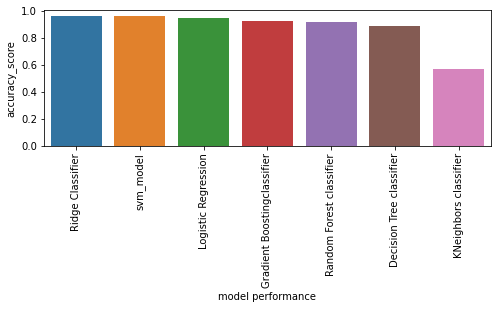

In [21]:
# visualizing the model_score result for easy grasp of the result
plt.figure(figsize=(8,2.5))
plt.xticks(rotation = 90)

model_compr = pd.DataFrame(data = model_score, index=['accuracy_score'])

sns.barplot(data=model_compr)
plt.ylabel('accuracy_score')
plt.xlabel('model performance')

### 7. Model Evaluation and comparison

In [22]:
# model_score = dict()
import itertools

pred_dict = dict()

# iterating through models dictionary to select the best three models
model_to_use = dict(itertools.islice(models.items(), 3))

# creating a function further code re-use
def predict(model_to_use, xv_test):
    """
    testing and evaluating 3 different machine learning models
    pred_dict : dictionary of different models from sklearn machine learning model
    xv_test = vectorized testing data 
    """
    #looping through the data
    for name, model in model_to_use.items():
        pred_dict[name] = model.predict(xv_test)
    return pred_dict

In [23]:
%%time
scor = predict(model_to_use=model_to_use, xv_test=xv_test)
df_pred =pd.DataFrame({'Actual':y_test, 'predicted Ridge Classifier':scor['Ridge Classifier'],
                  'predicted svm_model':scor['svm_model'],'predicted Logistic Regression':scor['Logistic Regression']})

Wall time: 3min 33s


In [24]:
df_pred.head(20) # showing the first 20 predicted values of the models for comparison

,Actual,predicted Ridge Classifier,predicted svm_model,predicted Logistic Regression
4535,0,0,0,0
4346,1,1,1,1
5736,0,0,0,0
2863,0,0,0,0
7205,1,1,1,1
14301,0,0,0,0
18614,0,0,0,0
14790,1,1,1,1
3213,0,0,0,0
5812,0,0,0,0


In [25]:
# creating a function further code re-use

def evaluation_report(y_test, pred_dict):
    #looping through the data
    
    for name, predict in pred_dict.items():
        
        matrix = confusion_matrix(y_test, predict)
        
        print('the accuracy_score for',name,'is',accuracy_score(y_test, predict),'\n')
        print('the classification_report for',name,'\n',classification_report(y_test, predict),'\n')
        display = ConfusionMatrixDisplay(confusion_matrix = matrix, display_labels=['Fake','True']).plot() 
        
        print('Report',name,'\n',display)
        
        plt.show()
        
    return plt.show()

the accuracy_score for Ridge Classifier is 0.9586538461538462 

the classification_report for Ridge Classifier 
               precision    recall  f1-score   support

           0       0.97      0.95      0.96      2073
           1       0.95      0.97      0.96      2087

    accuracy                           0.96      4160
   macro avg       0.96      0.96      0.96      4160
weighted avg       0.96      0.96      0.96      4160
 

Report Ridge Classifier 


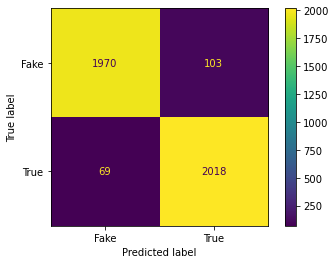

the accuracy_score for svm_model is 0.9588942307692307 

the classification_report for svm_model 
               precision    recall  f1-score   support

           0       0.96      0.96      0.96      2073
           1       0.96      0.96      0.96      2087

    accuracy                           0.96      4160
   macro avg       0.96      0.96      0.96      4160
weighted avg       0.96      0.96      0.96      4160
 

Report svm_model 


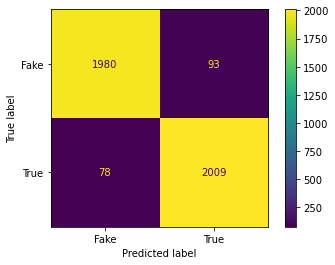

the accuracy_score for Logistic Regression is 0.9485576923076923 

the classification_report for Logistic Regression 
               precision    recall  f1-score   support

           0       0.95      0.94      0.95      2073
           1       0.94      0.95      0.95      2087

    accuracy                           0.95      4160
   macro avg       0.95      0.95      0.95      4160
weighted avg       0.95      0.95      0.95      4160
 

Report Logistic Regression 


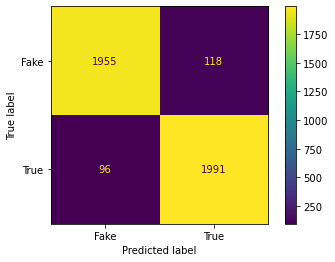

In [26]:
evaluation_report(y_test, pred_dict)

### hyperparameter tunning

In [ ]:
# defining parameter range 

param_grid = {'C':[0.01,0.1,1,10],
              'kernel' : ['linear','rbf'],
              'gamma':['scale', 'auto'],
              'gamma' : [0.01,1]}

svm_cv  = GridSearchCV(SVC() , param_grid , cv = 5 , n_jobs=1)

# fitting the model for grid search 
svm_cv.fit(xv_train,y_train)

# print best parameter after tuning 
print("best parameters: ",svm_cv.best_params_)

# print best train score after tuning 
print("Train SCore: ", svm_cv.best_score_ )

# print best train score after tuning 
print("Test Score: ", svm_cv.score(xv_test, y_test))

In [ ]:
# svm_cv_predictions = svm_cv.predict(xv_test)

# # print classification report 
# print(classification_report(y_test, svm_cv_predictions))

# # visualising our report for better grasp
# # 
# display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, svm_cv_predictions) , 
#                                  display_labels=['Fake','True']).plot() 
# print('Confusion Matrix Report \n', display)
# plt.show()

### 8.  Manual Model Testing


In [43]:
# Because SVM provides the best results, it will be used evaluate the news liability.

def out_put(word):
    if word ==1:
        return "Fake News"
    else:
        return "True News" 

    
def manual_testing(news):    
    # create a dictionary to hold the text
    testing_news = {"text":[news]}            
    
    # creates a table or dataframe
    new_def_test = pd.DataFrame(testing_news)    
    
    # applied text cleaning and processing on the new dataset
    new_def_test["text"] = new_def_test["text"].apply(clean_text) 
    
    # slicing the column text from the dataframe or table created the assign it to a new variable
    new_x_test = new_def_test["text"] 
    
    # modeling the new text for possible prediction
    New_xv_test = vectorization.transform(new_x_test)
    Ridge_model_prediction = models['Ridge Classifier'].predict(New_xv_test)
    svm_model_prediction = models['svm_model'].predict(New_xv_test)
    RL_model_prediction = models['Logistic Regression'].predict(New_xv_test)

    return print('\n Ridge_model_prediction: {} \n svm_model_prediction: {} \n RL_model_prediction: {}'
                 .format(out_put(Ridge_model_prediction),out_put(svm_model_prediction),out_put(RL_model_prediction)))

In [44]:
news = str(input('Paste text here: \n')
manual_testing(news)

Paste text here: 
Angels are everywhere in the MuÃ±iz familyâ€™s apartment in the Bronx: paintings of angels on the wall, ceramic angels flanking the ancient VCR, angels strumming lyres or blowing little golden trumpets on the bathroom shelves. As JosÃ© and Zoraida MuÃ±iz and their children have struggled to deal with a   series of trials and setbacks, including cancer, debilitating epilepsy, deep depression and near eviction, it has sometimes seemed as if angels and love were the only forces holding things together. Zoraidaâ€™s early life in Puerto Rico was like something from a tropical Dickens novel. She and her siblings and mother built a house by hand after a hurricane ravaged their home and the childrenâ€™s father withdrew support. Then Zoraidaâ€™s grandfather  â€”   the father of her absent father  â€”   destroyed the house in a rage. She was barely a teenager when she met JosÃ©, a Vietnam War veteran. With permission from her uncle, a judge, they were married. She was 14. He wa

In [28]:
import pickle

with open(r'C:\Joshua_file\Fake_News_SVC.pickle', 'wb') as f:
    pickle.dump(SVC_model_jo, f)

In [29]:
mod = SVC()
SVC_model_jo = mod.fit(xv_train, y_train)

In [30]:
filename = 'Fake_News_SVC'
pickle.dump(SVC_model_jo, open(filename,'wb'))

In [ ]:
# to save file
with open('SVM_model', 'wb') as f:
    pickle.dump(model, f)

In [32]:
#load file

with open('Fake_News_detection_model','rb') as f:
    mp = pickle.load(f)

In [ ]:
# alternative using joblib

from sklearn.externals import joblib
joblib.dump(SVC_model_jo, 'Svm_model_file')


In [ ]:
# loading the file
joblib.load('Svm_model_file')

In [33]:
mp.predict(xv_test)

array([0, 1, 0, ..., 0, 1, 0], dtype=int64)

In [39]:
def out_put(word):
    if word ==1:
        return "Fake News"
    else:
        return "True News" 

def manual_testing(news):    
    # create a dictionary to hold the text
    testing_news = {"text":[news]}            
    
    # creates a table or dataframe
    new_def_test = pd.DataFrame(testing_news)    
    
    # applied text cleaning and processing on the new dataset
    new_def_test["text"] = new_def_test["text"].apply(clean_text) 
    
    # slicing the column text from the dataframe or table created the assign it to a new variable
    new_x_test = new_def_test["text"] 
    
    # modeling the new text for possible prediction
    New_xv_test = vectorization.transform(new_x_test)
    svm_model_prediction = mp.predict(New_xv_test)
    return print('\n svm_model_prediction: {} '.format(out_put(svm_model_prediction)))

In [42]:
news = str(input('Paste text here: \n')) 

manual_testing(news)

Paste text here: 
Angels are everywhere in the MuÃ±iz familyâ€™s apartment in the Bronx: paintings of angels on the wall, ceramic angels flanking the ancient VCR, angels strumming lyres or blowing little golden trumpets on the bathroom shelves. As JosÃ© and Zoraida MuÃ±iz and their children have struggled to deal with a   series of trials and setbacks, including cancer, debilitating epilepsy, deep depression and near eviction, it has sometimes seemed as if angels and love were the only forces holding things together. Zoraidaâ€™s early life in Puerto Rico was like something from a tropical Dickens novel. She and her siblings and mother built a house by hand after a hurricane ravaged their home and the childrenâ€™s father withdrew support. Then Zoraidaâ€™s grandfather  â€”   the father of her absent father  â€”   destroyed the house in a rage. She was barely a teenager when she met JosÃ©, a Vietnam War veteran. With permission from her uncle, a judge, they were married. She was 14. He wa

In [ ]:
/-